# **Proyecto: Análisis del arbolado en CABA**

Introducción breve del proyecto

## Problema

Descripción breve de lo que vamos a analizar

## Importación de librerias


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Análisis Exploratorio de Datos

### Carga del dataset
Cargamos el dataset con Pandas. Imprimimos cuántas filas y columnas tiene, y sus cinco primeros registros.

In [4]:
data_arbolado = pd.read_csv("./datos/arbolado-publico-lineal-2011.csv")
print(f"El dataset tiene {data_arbolado.shape[0]} filas y {data_arbolado.shape[1]} columnas.")
duplicados = len(data_arbolado) - len(data_arbolado.drop_duplicates())
print(f"Duplicados: {duplicados}")
data_arbolado.head()

El dataset tiene 372699 filas y 20 columnas.
Duplicados: 0


,long,lat,tipo_sitio,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_folla,origen,codigo_man,barrio,comuna,calle,chapa1,chapa2
0,-58.389059,-34.620026,Árbol,2430,7,20,17,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1609,0
1,-58.389211,-34.620034,Árbol,2431,8,33,16,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1617,0
2,-58.389269,-34.620037,Árbol,2432,2,3,0,9,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,Árbol Latifoliado Perenne,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1629,0
3,-58.389525,-34.620052,Árbol,2433,9,17,0,7,Aceráceas,Acer,Acer negundo,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",0,0
4,-58.389608,-34.620057,Árbol,2434,6,13,14,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1655,0


Removemos algunas columnas que no vamos a utilizar para una mejor visualización:
- **lat y long**: Ambas columnas no me aportan información para el trabajo, para trabajar con la ubicación de los árboles utilizaremos las columnas **barrio** y **comuna**.
- **chapa1 y chapa2**: Dichas columnas no me aportan información que vaya a utilizar. Se refiere al número de la chapa del frente en donde se encuentra el árbol
- **id_especie y id_arbol**: Dichas columnas no aportan información que vaya a utilizar.
- **codigo_man**: Sucede exactamente lo mismo que con  **lat y long**. Se refiere al código de la manzana en la que está ubicado el árbol
- **tipo_sitio**:  No utilizaré esta columna ya que toma un único valor (Árbol) con lo cual no aporta información alguna.

In [5]:
data_arbolado = data_arbolado.drop(['long', 'lat', 'chapa1', 'chapa2', 'id_especie', 'id_arbol', 'codigo_man', 'tipo_sitio'], axis=1) 
print(f"El dataset tiene {data_arbolado.shape[0]} filas y {data_arbolado.shape[1]} columnas.")
data_arbolado = data_arbolado.rename({"altura_tot": "altura", "inclinacio":"inclinacion", "tipo_folla":"tipo_follaje"}, axis =1)
data_arbolado.head()

El dataset tiene 372699 filas y 12 columnas.


,altura,diametro,inclinacion,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_follaje,origen,barrio,comuna,calle
0,7,20,17,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1,"Calvo, Carlos"
1,8,33,16,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1,"Calvo, Carlos"
2,2,3,0,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,Árbol Latifoliado Perenne,Exótico,CONSTITUCION,1,"Calvo, Carlos"
3,9,17,0,Aceráceas,Acer,Acer negundo,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1,"Calvo, Carlos"
4,6,13,14,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,CONSTITUCION,1,"Calvo, Carlos"


In [6]:
data_arbolado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372699 entries, 0 to 372698
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   altura        372699 non-null  int64 
 1   diametro      372699 non-null  int64 
 2   inclinacion   372699 non-null  int64 
 3   nombre_fam    372699 non-null  object
 4   nombre_gen    372699 non-null  object
 5   nombre_cie    372699 non-null  object
 6   nombre_com    372694 non-null  object
 7   tipo_follaje  372699 non-null  object
 8   origen        372699 non-null  object
 9   barrio        372699 non-null  object
 10  comuna        372699 non-null  int64 
 11  calle         372699 non-null  object
dtypes: int64(4), object(8)
memory usage: 34.1+ MB


- Valores faltantes por columna

In [7]:
print("Los valores faltantes en cada columna son: ")
print("---------------------------------------------------------------------------")
print(data_arbolado.isna().sum())
print("---------------------------------------------------------------------------")

Los valores faltantes en cada columna son: 
---------------------------------------------------------------------------
altura          0
diametro        0
inclinacion     0
nombre_fam      0
nombre_gen      0
nombre_cie      0
nombre_com      5
tipo_follaje    0
origen          0
barrio          0
comuna          0
calle           0
dtype: int64
---------------------------------------------------------------------------


- Estadísticas de las columnas númericas

In [8]:
data_arbolado.describe()

,altura,diametro,inclinacion,comuna
count,372699.000000,372699.000000,372699.000000,372699.000000
mean,8.473044,31.941234,3.069783,9.124524
std,4.576818,20.207216,6.029910,3.866483
min,0.000000,0.000000,0.000000,1.000000
25%,5.000000,17.000000,0.000000,6.000000
50%,8.000000,28.000000,0.000000,10.000000
75%,11.000000,43.000000,5.000000,12.000000
max,60.000000,426.000000,60.000000,15.000000


Los tipos de follajes y sus cantidades de son: 
---------------------------------------------------------------------------
Árbol Latifoliado Caducifolio    296880
Árbol Latifoliado Perenne         56061
No Determinado                    12766
Palmera                            2908
Árbol Conífero Perenne             1431
Arbusto Perenne                    1246
Arbusto o Herbacea                  837
Arbusto Caducifolio                 476
Árbol Conífero Caducifolio           90
Miscelaneo                            4
Name: tipo_follaje, dtype: int64
---------------------------------------------------------------------------


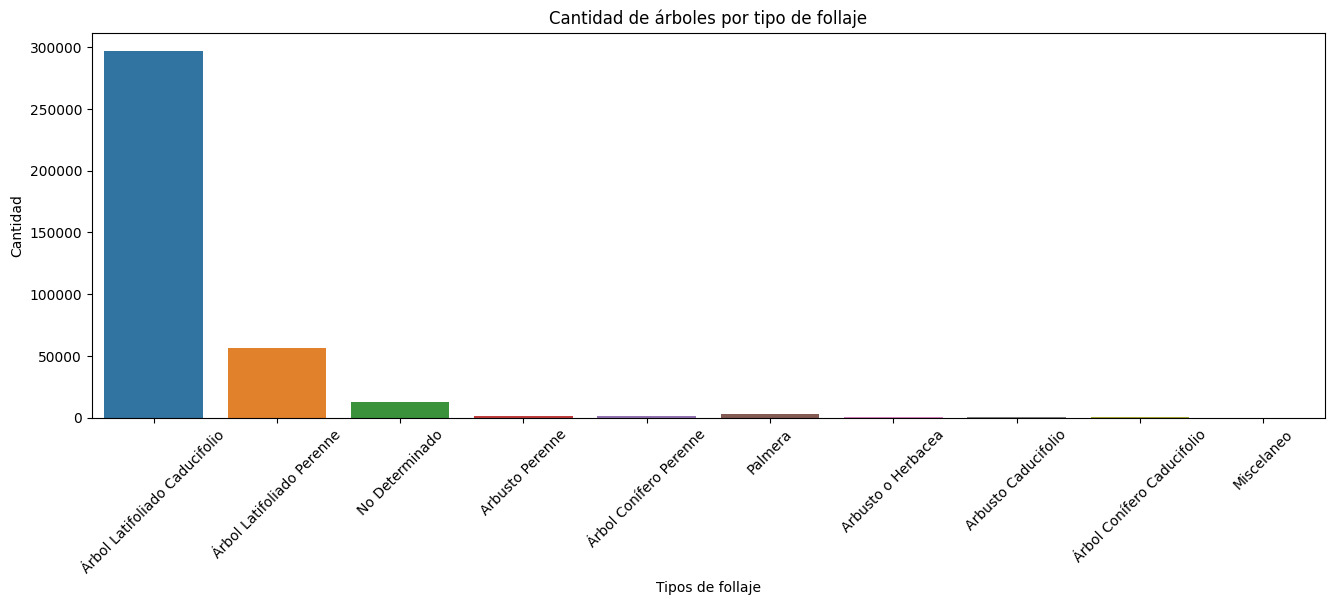

In [9]:
print("Los tipos de follajes y sus cantidades de son: ")
print("---------------------------------------------------------------------------")
print(data_arbolado.tipo_follaje.value_counts())
print("---------------------------------------------------------------------------")

plt.figure(figsize = (35,5))
plt.subplot(1,2,1)
sns.countplot(data = data_arbolado, x = "tipo_follaje")
plt.xticks(rotation = 45)
plt.ylabel("Cantidad")
plt.xlabel("Tipos de follaje")
plt.title("Cantidad de árboles por tipo de follaje")

plt.show()

In [10]:
print("Cantidad de árboles por barrio: ")
print("---------------------------------------------------------------------------")
data = data_arbolado.barrio.value_counts().to_dict()
for i in data:
    print(f"{i}: {data[i]}")
print("---------------------------------------------------------------------------")

Cantidad de árboles por barrio: 
---------------------------------------------------------------------------
PALERMO
MATADEROS
VILLA DEVOTO
CABALLITO
FLORES
VILLA URQUIZA
BELGRANO
VILLA LUGANO
SAAVEDRA
LINIERS
BARRACAS
PARQUE AVELLANEDA
NUEVA POMPEYA
PARQUE CHACABUCO
ALMAGRO
VILLA PUEYRREDON
RECOLETA
VILLA CRESPO
VILLA DEL PARQUE
NUÑEZ
BALVANERA
MONTE CASTRO
PARQUE PATRICIOS
BOEDO
VILLA LURO
VELEZ SARSFIELD
FLORESTA
COLEGIALES
VILLA SANTA RITA
VILLA SOLDATI
BOCA
CHACARITA
VILLA RIACHUELO
VILLA GRAL. MITRE
SAN CRISTOBAL
VILLA ORTUZAR
PARQUE CHAS
PATERNAL
VERSALLES
VILLA REAL
COGHLAN
CONSTITUCION
AGRONOMIA
RETIRO
PUERTO MADERO
MONSERRAT
SAN TELMO
SAN NICOLAS
Dique 1
Dique 3
Dique 4
---------------------------------------------------------------------------


In [11]:
origenes = data_arbolado.origen.value_counts()
print(origenes)

Exótico             334503
Nativo/Autóctono     30410
No Determinado        7786
Name: origen, dtype: int64


In [12]:
## Celda de prueba de columas númericas

# inclinaciones = data_arbolado.inclinacion.unique().tolist()
# alturas = data_arbolado.altura.unique().tolist()
# diametros = data_arbolado.diametro.unique().tolist()
# print(diametros.sort())
# print(f"Cantidad de inclinaciones: {len(inclinaciones)}")
# print(f"Cantidad de alturas: {len(alturas)}")
# print(f"Cantidad de diametros: {len(diametros)}")

# inclinaciones.sort()
# print(inclinaciones)
# cantidad_incliancion_0 = data_arbolado.loc[data_arbolado.inclinacion == 1]
# print(len(cantidad_incliancion_0))

In [13]:
# ESTA CELDA NADA MÁS LA VAMOS A USAR PARA BORRAR LAS COLUMNAS QUE NO NOS INTERESEN Y PARA SOBREESCRIBIR EL DATASET

#-Borramos columnas
# data_arbolado = data_arbolado.drop(['long', 'lat', 'chapa1', 'chapa2', 'id_especie', 'id_arbol', 'codigo_man', 'tipo_sitio'], axis=1) 

#-Escribimos un nuevo archivo con el dataset actualizado
# data_arbolado.to_csv(path_or_buf="./datos/arbolado_publico_lineal_bis.csv", index=False) 

#-Leemos el dataset actualizado y comprobamos los cambios imprimendo el dataframe
# data_arbolado_bis = pd.read_csv("./datos/arbolado_publico_lineal_bis.csv")

#-Mostramos el dataframe
# data_arbolado_bis

In [14]:
cantidad_diametro_1 = data_arbolado.loc[data_arbolado.diametro == 1]
print(len(cantidad_diametro_1))
cantidad_diametro_1

528


,altura,diametro,inclinacion,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_follaje,origen,barrio,comuna,calle
71,2,1,0,Moráceas,Ficus,Ficus benjamina,Ficus,Árbol Latifoliado Perenne,Exótico,CONSTITUCION,1,"Calvo, Carlos"
213,2,1,0,Litráceas,Lagerstroemia,Lagerstroemia indica,Crespón (Àrbol de Júpiter),Árbol Latifoliado Caducifolio,Exótico,MONSERRAT,1,Moreno
411,3,1,0,Bignoniáceas,Jacarandá,Jacarandá mimosifolia,Jacarandá,Árbol Latifoliado Caducifolio,Nativo/Autóctono,MONSERRAT,1,"Yrigoyen, Hipolito"
1079,1,1,0,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,RECOLETA,2,"Lopez, Vicente"
1172,3,1,0,Litráceas,Lagerstroemia,Lagerstroemia indica,Crespón (Àrbol de Júpiter),Árbol Latifoliado Caducifolio,Exótico,RECOLETA,2,Azcuenaga
...,...,...,...,...,...,...,...,...,...,...,...,...
362602,12,1,0,Moráceas,Ficus,Ficus benjamina variegata,Ficus variegado,Árbol Latifoliado Perenne,Exótico,VILLA RIACHUELO,8,"Paz, Gral. Av."
362801,4,1,0,Tiliaceas,Tilia,Tilia sp.,Tilo,No Determinado,Exótico,VILLA SOLDATI,8,Condor
363041,1,1,0,Rutaceas,Citrus,Citrus sp.,Citricos,Árbol Latifoliado Perenne,Exótico,VILLA SOLDATI,8,"Matorras De San Martin, Gregoria"
365864,2,1,4,No identificada,No identificado,No Determinable,No Determinable,No Determinado,No Determinado,MONTE CASTRO,10,Lascano
